## YouTube Analytic Report & Research Proposal
### By Marwin Soto

> Each country is known for their cultural differences but there is so much that brings us all together, including our love for YouTube.  Founded in San Mateo California on February 14, 2005, (Valentine’s Day, hence the love), YouTube has earned the love of billions as the most powerful video sharing website. I decided to analyze the trends of six countries to find which categories are the most popular and what videos are generating the most views. I discovered this dataset on Kaggle, and the creator built it using the YouTube API. There are currently ten countries available and I chose to examine USA, Great Britain, India, Canada, France, and Germany. YouTube data scientists developed a method to categorize videos as trending based on its rate of growth in views, likes, and more. This means that the videos with the most views are not necessarily trending because of the length of time since being uploaded takes away from the novelty. For example, new movie trailers or new music videos are known to make the trending list but there are many categories available to explore. For the purposes of this paper I want to find similarities among the countries as well as what unique information we can find among the trends. As we get deeper we will find which videos were popular and I will determine what information is valuable for strategies based on the perspective of a future data-business person. 

First, I will import the libraries that I'm using and the data from each country. The datasets are all formatted similarly so I will call "US.info()" for the United States data to provide a visual of the datatypes for each category and the columns each dataset contains. Then, "US.head()" to provide an example of the dataset before we dive deeper. Also, the trending date range of each dataset encompass a timeframe of seven months starting from November 14, 2017 up to June 14, 2018.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime

style.use('seaborn-bright')
% matplotlib inline

In [2]:
US = pd.read_csv('C:/Users/marwi/OneDrive/Desktop/t_direct/USvideos.csv')
GB = pd.read_csv('C:/Users/marwi/OneDrive/Desktop/t_direct/GBvideos.csv')
IN = pd.read_csv('C:/Users/marwi/OneDrive/Desktop/t_direct/INvideos.csv')
CA = pd.read_csv('C:/Users/marwi/OneDrive/Desktop/t_direct/CAvideos.csv')
FR = pd.read_csv('C:/Users/marwi/OneDrive/Desktop/t_direct/FRvideos.csv')
DE = pd.read_csv('C:/Users/marwi/OneDrive/Desktop/t_direct/DEvideos.csv')

In [3]:
US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [4]:
US.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


I was able to discern what each value of the category_id column represents by examining one of the many kernels available. The creator used the code below, but with my examination of the json file I was unable to discern how. I will display the head of the US json file for you to see and continue nonetheless. I must be honest because the 'category_id' values are an important part of conducting this analysis.

In [5]:
USj = pd.read_json('C:/Users/marwi/OneDrive/Desktop/t_direct/US_category_id.json')
USj.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [6]:
cat = {}

for category in USj['items']:
    cat[category['id']] = category['snippet']['title']
    
cat

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

It is understandable to imagine that there are many significant outliers within each category. That is because there are a low number of top trending videos compared to the average or median amount of the videos available. I will use 'value_counts()' to obtain the number of videos for each category. Then create variables with the constraint of a popular category, which I will generate the mean, median, and max values to visualize the distance of this comparison using boxplots.

In [7]:
print(US['category_id'].value_counts())
print(GB['category_id'].value_counts())
print(IN['category_id'].value_counts())
print(CA['category_id'].value_counts())
print(FR['category_id'].value_counts())
print(DE['category_id'].value_counts())

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64
10    13754
24     9124
22     2926
1      2577
26     1928
17     1907
23     1828
20     1788
25     1225
15      534
28      518
27      457
2       144
19       96
29       90
43       20
Name: category_id, dtype: int64
24    16712
25     5241
10     3858
23     3429
22     2624
1      1658
27     1227
26      845
17      731
28      552
43      205
29      105
2        72
20       66
30       16
19        8
15        3
Name: category_id, dtype: int64
24    13451
25     4159
22     4105
23     3773
10     3731
17     2787
1      2060
26     2007
20     1344
28     1155
27      991
19      392
15      369
2       353
43      124
29       74
30        6
Name: category_id, dtype: int64
24    9819
22    5719
23    4343
17    4342
10    3946
25    3752
26    2361
1     2157
20    14

With the exception of Britain, each country has a significantly higher amount of trending Entertainment videos, (24), compared to each category. Britain has a significantly higher amount of trending videos in the Music category, (10), due to many potential reasons. I hypothesize that the viewers are more interested in the Music category due to either superior content or slightly less interesting content produced by the Entertainment category during this timeframe, but this can be due to any number of factors. The Entertainment category has proven to consistently obtain a significantly higher amount of trending videos than most categories. Many factors contribute to reach the trending list, but we will examine this category based on views first because I am interested in analyzing what everyone is viewing most. Then we will examine other factors to compare how the videos were liked or disliked and if they inspired people to comment often.

Before we move forward let's check out Britain's top ten trends in the music category for fun.

In [8]:
GB[GB['category_id']==10].sort_values('views', ascending=False).head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
28412,_I_D_8Z4sJE,18.07.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,10,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",424538912,2818771,149275,99380,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Disponible en tu plataforma preferida:\nhttps:...
28212,_I_D_8Z4sJE,18.06.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,10,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",413586699,2768654,145643,97218,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Disponible en tu plataforma preferida:\nhttps:...
28008,_I_D_8Z4sJE,18.05.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,10,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",402650804,2719005,142006,95713,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Disponible en tu plataforma preferida:\nhttps:...
27811,_I_D_8Z4sJE,18.04.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,10,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",392036878,2670723,138334,93834,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Disponible en tu plataforma preferida:\nhttps:...
27615,_I_D_8Z4sJE,18.03.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,10,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",382401497,2618320,134625,92387,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Disponible en tu plataforma preferida:\nhttps:...
27424,_I_D_8Z4sJE,18.02.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,10,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",372399338,2564815,131168,90644,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Disponible en tu plataforma preferida:\nhttps:...
27241,_I_D_8Z4sJE,18.01.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,10,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",362111555,2506788,127178,89066,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Disponible en tu plataforma preferida:\nhttps:...
27052,_I_D_8Z4sJE,18.31.03,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,10,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",349987176,2440754,122408,86952,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Disponible en tu plataforma preferida:\nhttps:...
26861,_I_D_8Z4sJE,18.30.03,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,10,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",339629489,2378829,118294,85095,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Disponible en tu plataforma preferida:\nhttps:...
34460,9jI-z9QN6g8,18.18.05,"Te Bote Remix - Casper, Nio García, Darell, Ni...",Flow La Movie,10,2018-04-11T22:00:00.000Z,"Te Bote|""Te Bote Remix""|""Flow La Movie""|""Ozuna...",337621571,2581961,166549,113564,https://i.ytimg.com/vi/9jI-z9QN6g8/default.jpg,False,False,False,Flow La Movie Presenta - Te Boté Remix - Caspe...


I was not expecting to see the highest viewed music trend in GB was the music video 'X(EQUIS) Video Oficial' by Nicky Jam and J. Balvin in the reggaeton genre of music. By looking at the publish time and trending date columns you can see it was published February 3rd 2018 and remained trending for nine days consecutively from March 30th to April 7th. Examine the views, likes, dislikes, and comment_count as an example for how we will continue. This dataset has many insights to popular user trends so lets move forward by analyzing the entertainment category.

In [9]:
use = US[US['category_id']==24]
gbe = GB[GB['category_id']==24]
ine = IN[IN['category_id']==24]
cae = CA[CA['category_id']==24]
fre = FR[FR['category_id']==24]
dee = DE[DE['category_id']==24]

In [10]:
print('US Views Mean: {}'.format(np.mean(use.views)))
print('Britain Views Mean: {}'.format(np.mean(gbe.views)))
print('India Views Mean: {}'.format(np.mean(ine.views)))
print('Canada Views Mean: {}'.format(np.mean(cae.views)))
print('France Views Mean: {}'.format(np.mean(fre.views)))
print('Germany Views Mean: {}'.format(np.mean(dee.views)))

US Views Mean: 2067883.1990164593
Britain Views Mean: 3264607.9615300307
India Views Mean: 964599.7471278124
Canada Views Mean: 1016371.6830718906
France Views Mean: 384917.02097973315
Germany Views Mean: 529861.2800156944


In [11]:
print('US Views Median: {}'.format(np.median(use.views)))
print('Britain Views Median: {}'.format(np.median(gbe.views)))
print('India Views Median: {}'.format(np.median(ine.views)))
print('Canada Views Median: {}'.format(np.median(cae.views)))
print('France Views Median: {}'.format(np.median(fre.views)))
print('Germany Views Median: {}'.format(np.median(dee.views)))

US Views Median: 734704.0
Britain Views Median: 786954.0
India Views Median: 276843.0
Canada Views Median: 346166.0
France Views Median: 96072.0
Germany Views Median: 135691.5


In [12]:
print('US Views Max: {}'.format(np.max(use.views)))
print('Britain Views Max: {}'.format(np.max(gbe.views)))
print('India Views Max: {}'.format(np.max(ine.views)))
print('Canada Views Max: {}'.format(np.max(cae.views)))
print('France Views Max: {}'.format(np.max(fre.views)))
print('Germany Views Max: {}'.format(np.max(dee.views)))

US Views Max: 149376127
Britain Views Max: 169884583
India Views Max: 125432237
Canada Views Max: 137843120
France Views Max: 100911567
Germany Views Max: 113876217


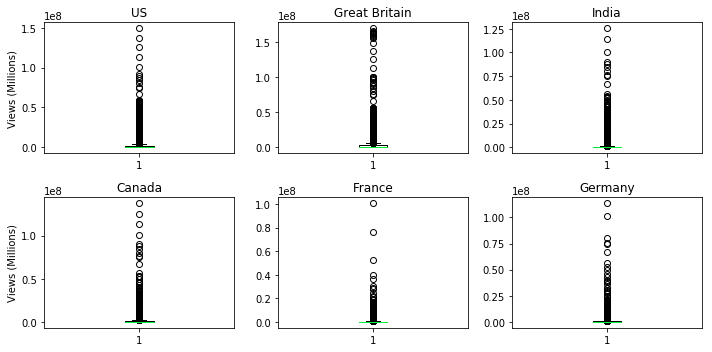

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.boxplot(use.views)
plt.ylabel('Views (Millions)')
plt.title('US')

plt.subplot(2, 3, 2)
plt.boxplot(gbe.views)
plt.title('Great Britain')

plt.subplot(2, 3, 3)
plt.boxplot(ine.views)
plt.title('India')

plt.subplot(2, 3, 4)
plt.boxplot(cae.views)
plt.ylabel('Views (Millions)')
plt.title('Canada')

plt.subplot(2, 3, 5)
plt.boxplot(fre.views)
plt.title('France')

plt.subplot(2, 3, 6)
plt.boxplot(dee.views)
plt.title('Germany')
plt.tight_layout()

plt.show();

As you can see, the median and 75th percentile for each country is at the bottom of each boxplot. Great Britain has a cluster of datapoints near the top but the rest of the countries have their top datapoints slightly scattered which means we may be able to identify which channel titles we can analyze further and pinpoint which videos were trending across the countries. Now, I will generate a list of the top ten for each and then we can further analyze interesting channel titles and see what content they produced that trended.

In [14]:
US[US['category_id']==24].sort_values('views', ascending=False).head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5935,FlsCjmMhFmw,17.13.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014471,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5699,FlsCjmMhFmw,17.12.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912702,1545015,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5452,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113874632,2811215,1470383,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5236,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656659,1353647,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
4997,6ZfuNTqbHE8,17.08.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",91933007,2625661,53709,350458,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4743,6ZfuNTqbHE8,17.07.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",89930713,2606662,53011,347982,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4514,6ZfuNTqbHE8,17.06.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87449453,2584672,52176,341571,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4276,6ZfuNTqbHE8,17.05.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",84281319,2555411,51008,339708,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4043,6ZfuNTqbHE8,17.04.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",80360459,2513099,49169,335920,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...


In [15]:
GB[GB['category_id']==24].sort_values('views', ascending=False).head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
8189,FlsCjmMhFmw,17.24.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",169884583,3312868,1753274,845233,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
7978,FlsCjmMhFmw,17.23.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",165905535,3278403,1739579,841074,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
7772,FlsCjmMhFmw,17.22.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",164743418,3261606,1732859,838625,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
7563,FlsCjmMhFmw,17.21.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",163726971,3248008,1727826,836841,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
7344,FlsCjmMhFmw,17.20.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",162929816,3233346,1722307,834159,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
7132,FlsCjmMhFmw,17.19.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",161185315,3211827,1712284,830676,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
6923,FlsCjmMhFmw,17.18.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",160544046,3200440,1704861,827463,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
6713,FlsCjmMhFmw,17.17.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",159604206,3186007,1694945,823927,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
6506,FlsCjmMhFmw,17.16.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",158002943,3165234,1683321,821444,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
6280,FlsCjmMhFmw,17.15.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",156305907,3140248,1668460,817110,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."


In [16]:
IN[IN['category_id']==24].sort_values('views', ascending=False).head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
5408,FlsCjmMhFmw,17.12.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912710,1545017,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5119,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811216,1470387,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
4936,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656672,1353650,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
4477,6ZfuNTqbHE8,17.07.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",89930713,2606663,53011,347982,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4236,6ZfuNTqbHE8,17.06.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87449453,2584674,52176,341571,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4013,6ZfuNTqbHE8,17.05.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",84281319,2555411,51008,339708,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
3823,6ZfuNTqbHE8,17.04.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",80360459,2513102,49170,335920,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4743,FlsCjmMhFmw,17.09.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251815,1127805,827755,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
3639,6ZfuNTqbHE8,17.03.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",74789251,2444956,46172,330710,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
3456,6ZfuNTqbHE8,17.02.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",66637636,2331352,41154,316185,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...


In [17]:
CA[CA['category_id']==24].sort_values('views', ascending=False).head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
5900,FlsCjmMhFmw,17.13.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014479,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5623,FlsCjmMhFmw,17.12.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125431369,2912715,1545018,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5398,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811217,1470387,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5197,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656678,1353655,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
4699,6ZfuNTqbHE8,17.07.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",89930713,2606665,53011,347982,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4451,6ZfuNTqbHE8,17.06.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87450245,2584675,52176,341571,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4202,6ZfuNTqbHE8,17.05.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",84281319,2555414,51008,339708,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
3998,6ZfuNTqbHE8,17.04.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",80360459,2513103,49170,335920,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4996,FlsCjmMhFmw,17.09.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251826,1127811,827755,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
3798,6ZfuNTqbHE8,17.03.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",74789251,2444960,46172,330710,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...


In [18]:
FR[FR['category_id']==24].sort_values('views', ascending=False).head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
5342,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind""|""Rewind 2017""|""youtube rewind 2017""|""#...",100911567,2656682,1353661,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5040,FlsCjmMhFmw,17.09.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind""|""Rewind 2017""|""youtube rewind 2017""|""#...",75969469,2251828,1127813,827755,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
4804,FlsCjmMhFmw,17.08.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind""|""Rewind 2017""|""youtube rewind 2017""|""#...",52611730,1891827,884962,702790,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
24755,QwievZ1Tx-8,18.20.03,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel""|""comics""|""comic books""|""nerd""|""geek""|""...",39980116,1420090,26137,177598,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...
24517,QwievZ1Tx-8,18.19.03,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel""|""comics""|""comic books""|""nerd""|""geek""|""...",36112519,1355014,22416,170801,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...
24309,QwievZ1Tx-8,18.18.03,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel""|""comics""|""comic books""|""nerd""|""geek""|""...",30180849,1242234,16902,158047,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...
30994,rRr1qiJRsXk,18.26.04,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,FoxStarHindi,24,2018-04-24T07:58:08.000Z,"Sanju Teaser""|""Official Teaser""|""Sanju Officia...",28572753,646407,21140,40610,https://i.ytimg.com/vi/rRr1qiJRsXk/default.jpg,False,False,False,Few lives in our times are as dramatic and eni...
30668,u9Mv98Gr5pY,18.25.04,VENOM - Official Trailer (HD),Sony Pictures Entertainment,24,2018-04-24T03:45:03.000Z,"Venom""|""Venom Movie""|""Venom (2018)""|""Marvel""|""...",27973210,850373,26543,96767,https://i.ytimg.com/vi/u9Mv98Gr5pY/default.jpg,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...
4598,FlsCjmMhFmw,17.07.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind""|""Rewind 2017""|""youtube rewind 2017""|""#...",24784870,1149222,483950,461979,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
37913,1J76wN0TPI4,18.31.05,Sanju | Official Trailer | Ranbir Kapoor | Raj...,FoxStarHindi,24,2018-05-30T07:51:32.000Z,"Sanju|""Official Trailer""|""sanju official trail...",21739537,549875,16991,41068,https://i.ytimg.com/vi/1J76wN0TPI4/default.jpg,False,False,False,Few lives in our times are as dramatic and eni...


In [19]:
CA[CA['category_id']==24].sort_values('views', ascending=False).head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
5900,FlsCjmMhFmw,17.13.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014479,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5623,FlsCjmMhFmw,17.12.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125431369,2912715,1545018,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5398,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811217,1470387,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5197,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656678,1353655,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
4699,6ZfuNTqbHE8,17.07.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",89930713,2606665,53011,347982,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4451,6ZfuNTqbHE8,17.06.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87450245,2584675,52176,341571,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4202,6ZfuNTqbHE8,17.05.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",84281319,2555414,51008,339708,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
3998,6ZfuNTqbHE8,17.04.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",80360459,2513103,49170,335920,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4996,FlsCjmMhFmw,17.09.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251826,1127811,827755,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
3798,6ZfuNTqbHE8,17.03.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",74789251,2444960,46172,330710,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...


In [20]:
DE[DE['category_id']==24].sort_values('views', ascending=False).head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
5455,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811217,1470386,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5221,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656675,1353652,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
4062,6ZfuNTqbHE8,17.04.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",80360459,2513103,49170,335920,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
5004,FlsCjmMhFmw,17.09.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251819,1127810,827755,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
3808,6ZfuNTqbHE8,17.03.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",74789251,2444956,46172,330710,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
3601,6ZfuNTqbHE8,17.02.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",66637636,2331354,41154,316185,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
3399,6ZfuNTqbHE8,17.01.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",56367282,2157737,34077,303178,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4799,FlsCjmMhFmw,17.08.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",52611730,1891817,884959,702784,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
31395,u9Mv98Gr5pY,18.28.04,VENOM - Official Trailer (HD),Sony Pictures Entertainment,24,2018-04-24T03:45:03.000Z,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",49185287,1204863,42254,130891,https://i.ytimg.com/vi/u9Mv98Gr5pY/default.jpg,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...
31145,u9Mv98Gr5pY,18.27.04,VENOM - Official Trailer (HD),Sony Pictures Entertainment,24,2018-04-24T03:45:03.000Z,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",45759148,1166897,40086,127694,https://i.ytimg.com/vi/u9Mv98Gr5pY/default.jpg,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...


After examining the top ten from each country we can easily see that the trend during that time were the channel titles "YouTube Spotlight" and "Marvel Entertainment". This was when Marvel Studios was publicising the release of the movie "Avengers: Infinity War". YouTube Spotlight produced a nostalgic montage of popular videos, people, music, and memes during 2017 with "YouTube Rewind: The Shape of 2017", named after the popular song "Shape of You" by Ed Sheeran. Also, one unique trend that I was not expecting to find in France is the "Sanju Official Teaser" video from the channel "FoxStarHindi" which leads me to believe that Bollywood films are very popular there. 

We will now conduct an analysis to discern which of these two channels could be the more favored of these six countries. This will include a time series analysis so we can see the differences seasonally. By converting the 'trending_date' to become our 'DateTime' index and filtering the dates by winter, spring, and the beginning of summer.

In [21]:
US['trending_date'] = pd.to_datetime(US['trending_date'], format='%y.%d.%m')
US.set_index('trending_date', inplace=True)
GB['trending_date'] = pd.to_datetime(GB['trending_date'], format='%y.%d.%m')
GB.set_index('trending_date', inplace=True)
IN['trending_date'] = pd.to_datetime(IN['trending_date'], format='%y.%d.%m')
IN.set_index('trending_date', inplace=True)
CA['trending_date'] = pd.to_datetime(CA['trending_date'], format='%y.%d.%m')
CA.set_index('trending_date', inplace=True)
FR['trending_date'] = pd.to_datetime(FR['trending_date'], format='%y.%d.%m')
FR.set_index('trending_date', inplace=True)
DE['trending_date'] = pd.to_datetime(DE['trending_date'], format='%y.%d.%m')
DE.set_index('trending_date', inplace=True)

Now the index is converted from 'RangeIndex' to a 'DatetimeIndex' which I will show by calling 'US.info()' again and you can see the difference from the first example by looking at the second line.

In [22]:
US.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40949 entries, 2017-11-14 to 2018-06-14
Data columns (total 15 columns):
video_id                  40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(7)
memory usage: 4.2+ MB


In [23]:
usy = US[US['channel_title'] == "YouTube Spotlight"]
gby = GB[GB['channel_title'] == "YouTube Spotlight"]
iny = IN[IN['channel_title'] == "YouTube Spotlight"]
cay = CA[CA['channel_title'] == "YouTube Spotlight"]
fry = FR[FR['channel_title'] == "YouTube Spotlight"]
dey = DE[DE['channel_title'] == "YouTube Spotlight"]

usmarvel = US[US['channel_title'] == "Marvel Entertainment"]
gbmarvel = GB[GB['channel_title'] == "Marvel Entertainment"]
inmarvel = IN[IN['channel_title'] == "Marvel Entertainment"]
camarvel = CA[CA['channel_title'] == "Marvel Entertainment"]
frmarvel = FR[FR['channel_title'] == "Marvel Entertainment"]
demarvel = DE[DE['channel_title'] == "Marvel Entertainment"]

I filtered the datasets by 'channel_title', and next we will see which video titles were popular with the 'value_counts' command. The values represent how many times each video title made the trending list. This value does not represent which is the most popular but that certain releases reached the trending list more times than others. Because of the vast difference between views compared to likes, dislikes, and comment_count I will be creating separate subplots for clearer visualizations. I will plot the views first, then for the disparity in the latter we will be able to see how many likes compared to dislikes and whether they sparked conversations with the amount of comments.

In [24]:
print(usmarvel.title.value_counts())
print(gbmarvel.title.value_counts())
print(inmarvel.title.value_counts())
print(camarvel.title.value_counts())
print(frmarvel.title.value_counts())
print(demarvel.title.value_counts())

Marvel Studios' Ant-Man and The Wasp - Official Trailer                23
Marvel Studios' Avengers: Infinity War - Official Trailer              13
Marvel Studios' Avengers: Infinity War | 10-Year Legacy Featurette     12
Marvel Studios' Avengers: Infinity War Official Trailer                 9
Legion | Season 2 - Official Trailer                                    9
Marvel Studios' Avengers: Infinity War - All of Them TV Spot            9
Marvel Studios 10th Anniversary Announcement – Class Photo Video        9
MARVEL COMICS 2018: A Fresh Start                                       8
Marvel Studios' Black Panther - Warriors of Wakanda                     7
Marvel Studios' Black Panther - Kinetic Energy Film Clip                6
Marvel Studios' Ant-Man and the Wasp - Official Trailer                 5
Marvel Studios' Avengers: Infinity War -- Family Featurette             5
Marvel Studios’ Avengers: Infinity War - Big Game Spot                  4
Marvel’s Agents of S.H.I.E.L.D. | Seas

In [25]:
print(usy.title.value_counts())
print(gby.title.value_counts())
print(iny.title.value_counts())
print(cay.title.value_counts())
print(fry.title.value_counts())
print(dey.title.value_counts())

YouTube Rewind: The Shape of 2017 | #YouTubeRewind    8
#ProudToCreate: Pride 2018                            7
#VeteransDay: Thank You for Everything                3
Name: title, dtype: int64
YouTube Rewind: The Shape of 2017 | #YouTubeRewind    18
#VeteransDay: Thank You for Everything                 9
Name: title, dtype: int64
YouTube Rewind: The Shape of 2017 | #YouTubeRewind    6
Name: title, dtype: int64
YouTube Rewind: The Shape of 2017 | #YouTubeRewind     7
#ProudToCreate: Pride 2018                             4
Get Ready for YouTube Rewind 2017 | #RewindisComing    2
Name: title, dtype: int64
YouTube Rewind: The Shape of 2017 | #YouTubeRewind     4
Get Ready for YouTube Rewind 2017 | #RewindisComing    1
Name: title, dtype: int64
YouTube Rewind: The Shape of 2017 | #YouTubeRewind     5
Get Ready for YouTube Rewind 2017 | #RewindisComing    1
Name: title, dtype: int64


## Analytic Questions

The value_counts show that many Marvel film and tv show trailers were released and trended often. The two most popular trailers were "Ant-Man and The Wasp" and "Avengers: Infinity War". From the YouTube Spotlight channel we can see the "YouTube Rewind: The Shape of 2017" trending several times across the countries but with much less trending video titles. 

Which video titles were popular across all of these countries? 
When did the most significant trends occur? 
How do the likes or dislikes compare depending on the channel?
Will we learn anything unique about trends in any country?

Because YouTube Spotlight produced less trending titles we should be able to conduct a quick analysis compared to the wide range of content trending from Marvel Entertainment, but we can use plots to learn more.

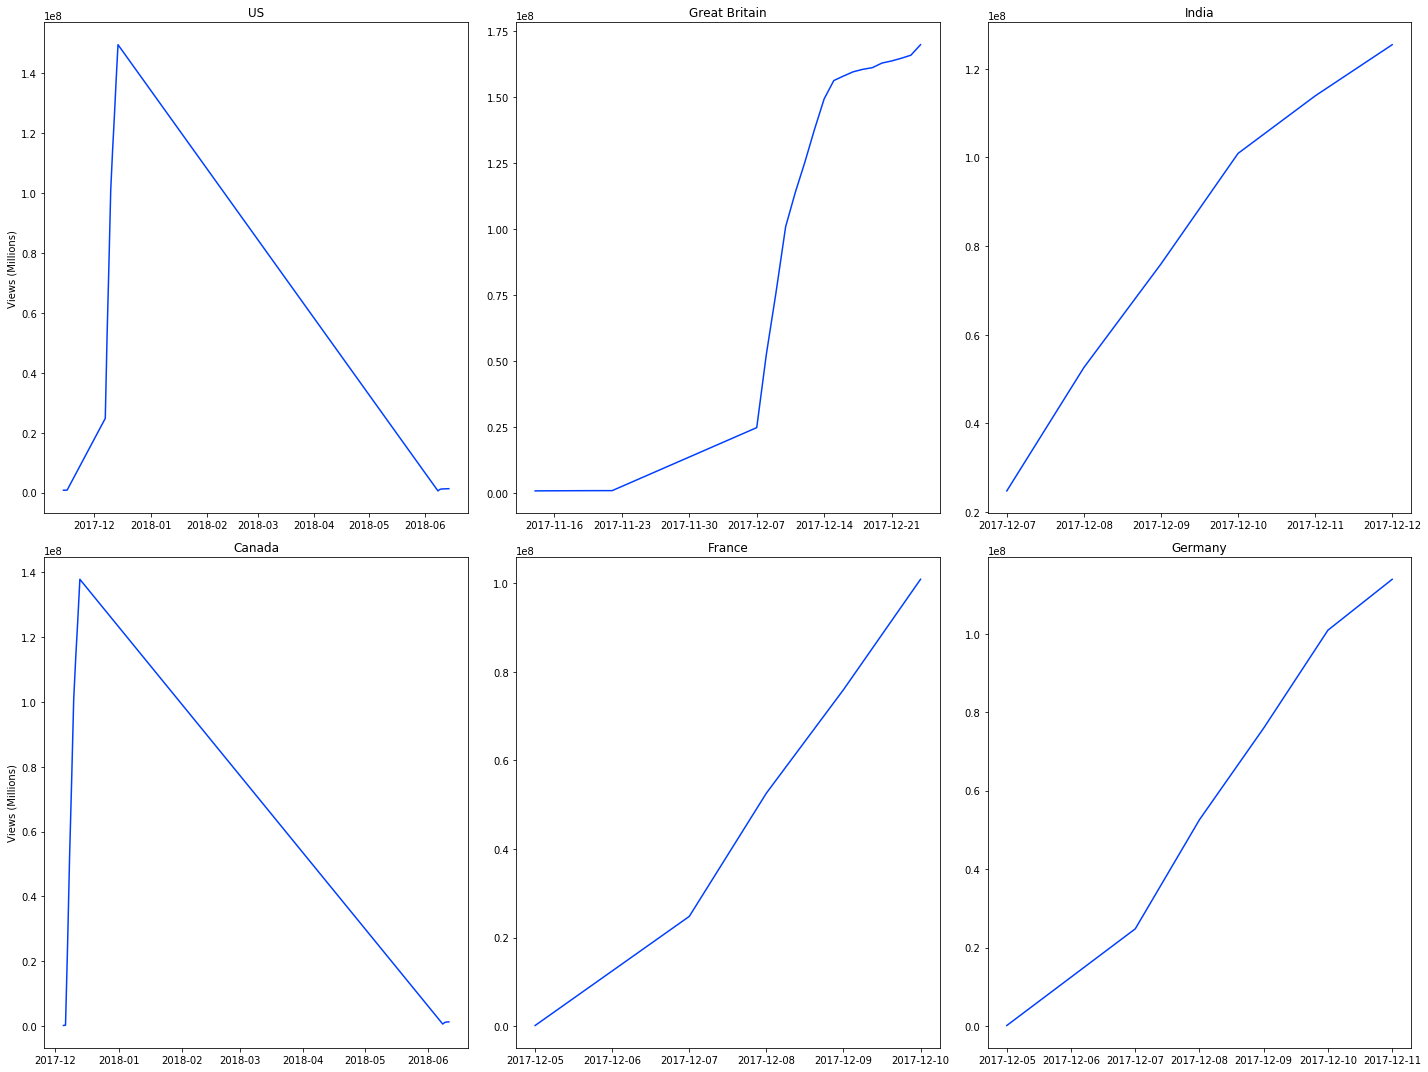

In [26]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 1)
plt.ylabel('Views (Millions)')
plt.plot(usy.views)
plt.title('US')

plt.subplot(2, 3, 2)
plt.plot(gby.views)
plt.title('Great Britain')

plt.subplot(2, 3, 3)
plt.plot(iny.views)
plt.title('India')

plt.subplot(2, 3, 4)
plt.plot(cay.views)
plt.ylabel('Views (Millions)')
plt.title('Canada')

plt.subplot(2, 3, 5)
plt.plot(fry.views)
plt.title('France')

plt.subplot(2, 3, 6)
plt.plot(dey.views)
plt.title('Germany')

plt.tight_layout()
plt.show();

At first glance it appears that YouTube Spotlight is very popular in Britain, India, France, and Germany. We converted the index to Datetime so we can see that the growth ends mid-December or that the channel only trended a few weeks within the seven month timeframe. But, there is a downward trend in US and Canda with a small bump in June where the range ends. Now we will compare the views with likes, dislikes, and comments to see how much people enjoyed the content.

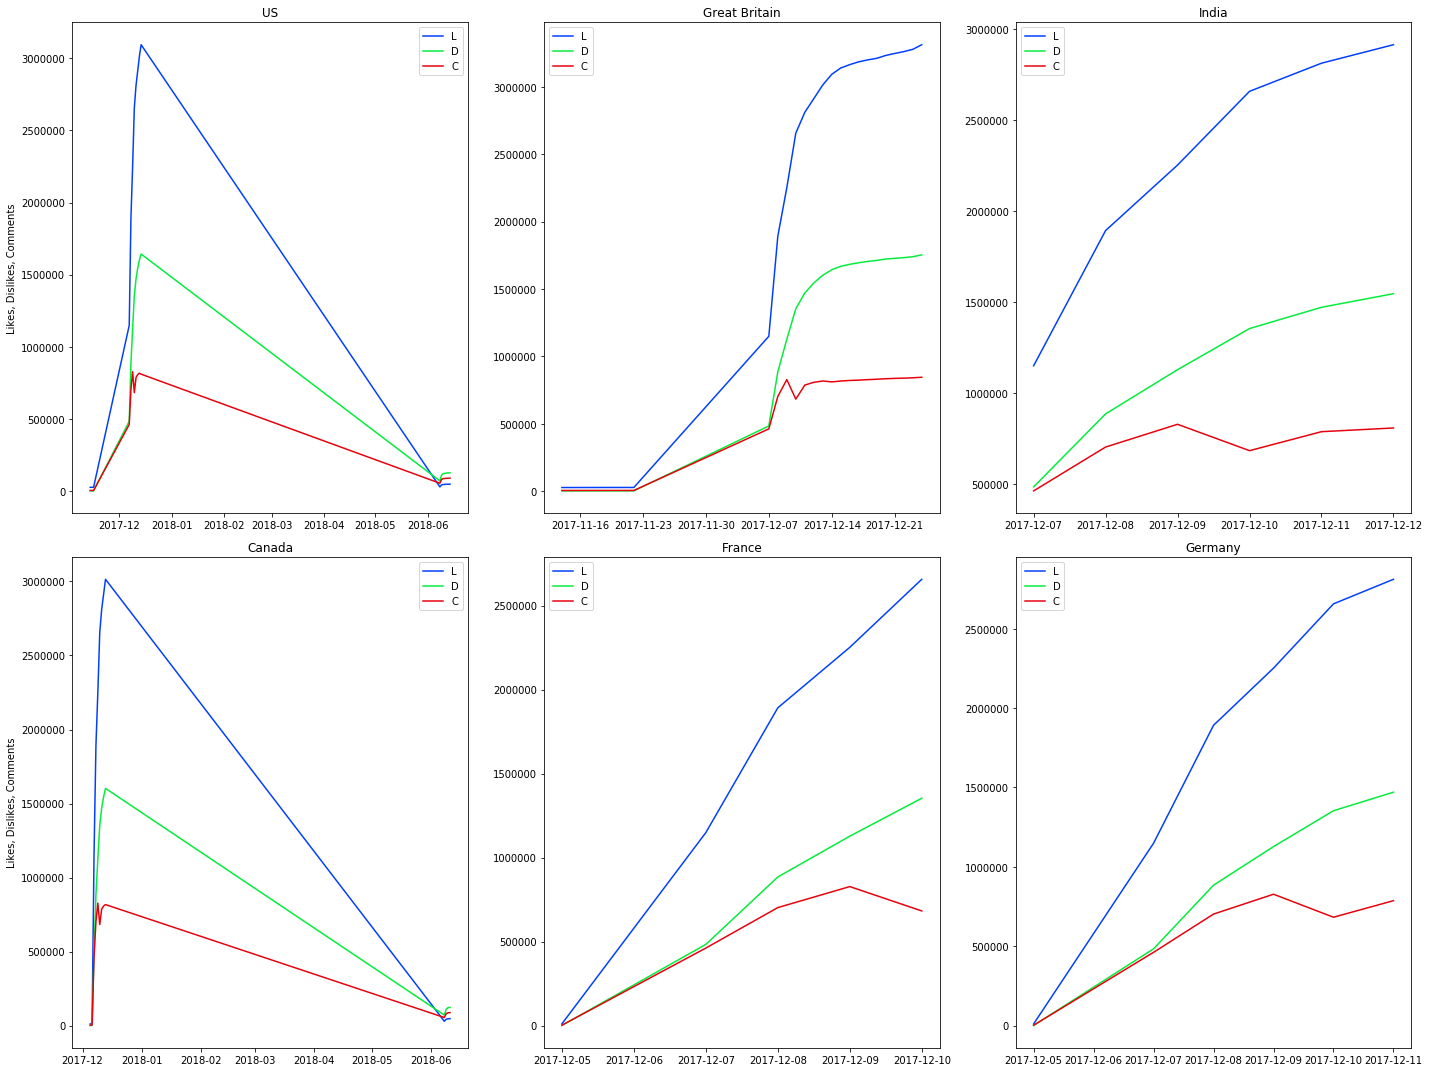

In [27]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 1)
plt.ylabel('Likes, Dislikes, Comments')
plt.plot(usy[['likes', 'dislikes', 'comment_count']])
plt.legend('LDC')
plt.title('US')

plt.subplot(2, 3, 2)
plt.plot(gby[['likes', 'dislikes', 'comment_count']])
plt.legend('LDC')
plt.title('Great Britain')

plt.subplot(2, 3, 3)
plt.plot(iny[['likes', 'dislikes', 'comment_count']])
plt.legend('LDC')
plt.title('India')

plt.subplot(2, 3, 4)
plt.plot(cay[['likes', 'dislikes', 'comment_count']])
plt.ylabel('Likes, Dislikes, Comments')
plt.legend('LDC')
plt.title('Canada')

plt.subplot(2, 3, 5)
plt.plot(fry[['likes', 'dislikes', 'comment_count']])
plt.legend('LDC')
plt.title('France')

plt.subplot(2, 3, 6)
plt.plot(dey[['likes', 'dislikes', 'comment_count']])
plt.legend('LDC')
plt.title('Germany')

plt.tight_layout()
plt.show();

Now proportionately we can see that the dislikes are roughly half of the amount of likes. It did spark some conversations but the amount of dislikes are visibly higher than the amount of comments. Now lets see what caused the bump in June for the US and Canada and try to determine which videos were trending and why.

In [28]:
usy['2018-5-30': '2018-6-14']

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-06-08,GnGPAYvve1A,#ProudToCreate: Pride 2018,YouTube Spotlight,24,2018-06-07T19:08:51.000Z,"#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudTo...",597669,29781,71617,55110,https://i.ytimg.com/vi/GnGPAYvve1A/default.jpg,False,False,False,You don't just imagine a better future – you c...
2018-06-09,GnGPAYvve1A,#ProudToCreate: Pride 2018,YouTube Spotlight,24,2018-06-07T19:08:51.000Z,"#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudTo...",1074997,43153,110997,81289,https://i.ytimg.com/vi/GnGPAYvve1A/default.jpg,False,False,False,You don't just imagine a better future – you c...
2018-06-10,GnGPAYvve1A,#ProudToCreate: Pride 2018,YouTube Spotlight,24,2018-06-07T19:08:51.000Z,"#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudTo...",1227495,46556,121865,87199,https://i.ytimg.com/vi/GnGPAYvve1A/default.jpg,False,False,False,You don't just imagine a better future – you c...
2018-06-11,GnGPAYvve1A,#ProudToCreate: Pride 2018,YouTube Spotlight,24,2018-06-07T19:08:51.000Z,"#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudTo...",1253843,47073,123424,88066,https://i.ytimg.com/vi/GnGPAYvve1A/default.jpg,False,False,False,You don't just imagine a better future – you c...
2018-06-12,GnGPAYvve1A,#ProudToCreate: Pride 2018,YouTube Spotlight,24,2018-06-07T19:08:51.000Z,"#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudTo...",1291035,47762,125583,89296,https://i.ytimg.com/vi/GnGPAYvve1A/default.jpg,False,False,False,You don't just imagine a better future – you c...
2018-06-13,GnGPAYvve1A,#ProudToCreate: Pride 2018,YouTube Spotlight,24,2018-06-07T19:08:51.000Z,"#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudTo...",1315418,48135,126480,89956,https://i.ytimg.com/vi/GnGPAYvve1A/default.jpg,False,False,False,You don't just imagine a better future – you c...
2018-06-14,GnGPAYvve1A,#ProudToCreate: Pride 2018,YouTube Spotlight,24,2018-06-07T19:08:51.000Z,"#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudTo...",1329391,48386,126931,90365,https://i.ytimg.com/vi/GnGPAYvve1A/default.jpg,False,False,False,You don't just imagine a better future – you c...


In [29]:
cay['2018-5-30': '2018-6-14']

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-06-08,GnGPAYvve1A,#ProudToCreate: Pride 2018,YouTube Spotlight,24,2018-06-07T19:08:51.000Z,"#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudTo...",597669,29781,71617,55110,https://i.ytimg.com/vi/GnGPAYvve1A/default.jpg,False,False,False,You don't just imagine a better future – you c...
2018-06-09,GnGPAYvve1A,#ProudToCreate: Pride 2018,YouTube Spotlight,24,2018-06-07T19:08:51.000Z,"#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudTo...",1074997,43153,110997,81289,https://i.ytimg.com/vi/GnGPAYvve1A/default.jpg,False,False,False,You don't just imagine a better future – you c...
2018-06-10,GnGPAYvve1A,#ProudToCreate: Pride 2018,YouTube Spotlight,24,2018-06-07T19:08:51.000Z,"#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudTo...",1227495,46556,121865,87199,https://i.ytimg.com/vi/GnGPAYvve1A/default.jpg,False,False,False,You don't just imagine a better future – you c...
2018-06-11,GnGPAYvve1A,#ProudToCreate: Pride 2018,YouTube Spotlight,24,2018-06-07T19:08:51.000Z,"#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudTo...",1253843,47073,123424,88066,https://i.ytimg.com/vi/GnGPAYvve1A/default.jpg,False,False,False,You don't just imagine a better future – you c...


YouTube Spotlight had one video that trended multiple times in June titled '#ProudToCreate: Pride 2018' in celebration of the LGBTQ community because June is officially known as Pride awareness month. This means that the downward trend reflects the lack of trending content produced by YouTube Spotlight and that even though this video made the trending list, it performed significantly less than 'YouTube Rewind: Shape of 2017'. This further proves that nostalgic content produced in December is highly effective across these countries and that content produced to positively promote the LGBTQ community has potential to gain traction in June within the US and Canada. 

Now based on what we learned about YouTube Spotlight, we can conduct a similar analyis with Marvel Entertainment and compare the performance based on views, likes, dislikes, and comments to see if there is a consistent appreciation for Marvel Entertainment across these countries or if there is any unique information we can learn.

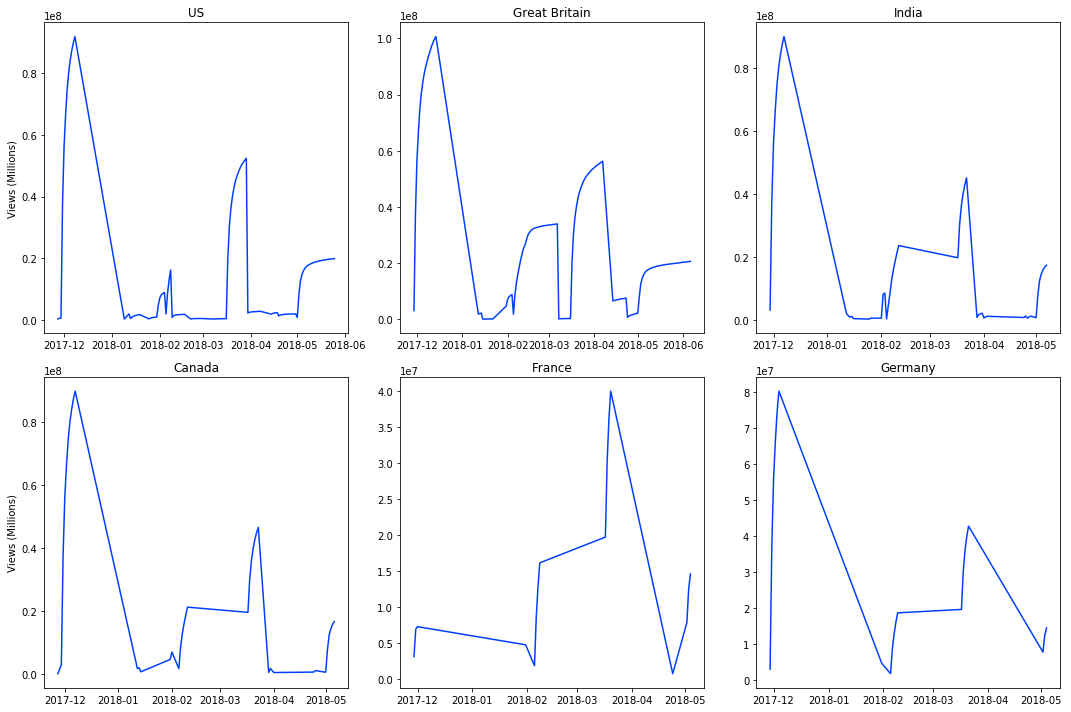

In [30]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.ylabel('Views (Millions)')
plt.plot(usmarvel.views)
plt.title('US')

plt.subplot(2, 3, 2)
plt.plot(gbmarvel.views)
plt.title('Great Britain')

plt.subplot(2, 3, 3)
plt.plot(inmarvel.views)
plt.title('India')

plt.subplot(2, 3, 4)
plt.plot(camarvel.views)
plt.ylabel('Views (Millions)')
plt.title('Canada')

plt.subplot(2, 3, 5)
plt.plot(frmarvel.views)
plt.title('France')

plt.subplot(2, 3, 6)
plt.plot(demarvel.views)
plt.title('Germany')

plt.tight_layout()
plt.show();

Based on the views we can see trends consistently spread across the seven month time frame with varying sizes of spikes and the largest in December, except in France. We can also see that the second largest spike is in April. The third largest spike is in February for the majority of countries except for the US, which has its third largest spike in May. We noticed that with YouTube Spotlight channel the dislikes were roughly half of the likes, so lets see how much people like and dislike Marvel content and also how much the comment counts compare.

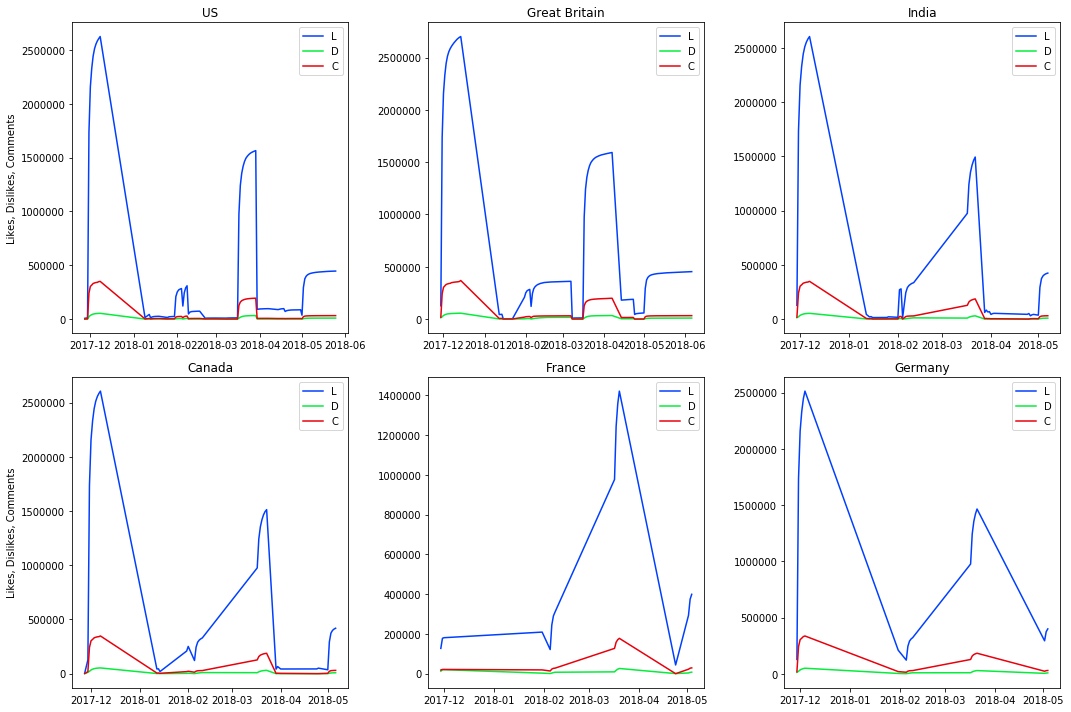

In [31]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.plot(usmarvel[['likes', 'dislikes', 'comment_count']])
plt.ylabel('Likes, Dislikes, Comments')
plt.legend('LDC')
plt.title('US')

plt.subplot(2, 3, 2)
plt.plot(gbmarvel[['likes', 'dislikes', 'comment_count']])
plt.legend('LDC')
plt.title('Great Britain')

plt.subplot(2, 3, 3)
plt.plot(inmarvel[['likes', 'dislikes', 'comment_count']])
plt.legend('LDC')
plt.title('India')

plt.subplot(2, 3, 4)
plt.plot(camarvel[['likes', 'dislikes', 'comment_count']])
plt.ylabel('Likes, Dislikes, Comments')
plt.legend('LDC')
plt.title('Canada')

plt.subplot(2, 3, 5)
plt.plot(frmarvel[['likes', 'dislikes', 'comment_count']])
plt.legend('LDC')
plt.title('France')

plt.subplot(2, 3, 6)
plt.plot(demarvel[['likes', 'dislikes', 'comment_count']])
plt.legend('LDC')
plt.title('Germany')

plt.tight_layout()
plt.show();

Again we can see consistent spikes during December, except in France. Also, the red line depicts that these videos sparked many conversations in the comments and the green line depicting 'dislikes' trailing on the floor. From a data-business person perspective, this example could potentially provide valuable insight regarding large budget decisions which could be effective in other countries or seasons but December in France may require a different strategy. For example, Marvel actors getting endorsments to appear in commercials and advertisements for a range of products and services. This also raises the question, what could be spiking the trends in December that did not trend in France until April? What consistently trended across these countries in February, April, and June? Is it the same video or different videos? The largest spike occurred between December and January so lets examine closer by sorting the values by top 3. Then we will follow with a closer view of what caused the spikes within April, February, and June by top 3.

In [32]:
usmarvel['2017-11-14': '2018-1-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2017-12-08,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",91933007,2625661,53709,350458,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
2017-12-07,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",89930713,2606662,53011,347982,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
2017-12-06,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87449453,2584672,52176,341571,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...


In [33]:
gbmarvel['2017-11-14': '2018-1-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2017-12-14,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",100672931,2701353,56313,368739,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
2017-12-13,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",99732510,2693569,56081,359731,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
2017-12-12,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",98560503,2683711,55752,356768,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...


In [34]:
inmarvel['2017-11-14': '2018-1-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2017-12-07,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",89930713,2606663,53011,347982,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
2017-12-06,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87449453,2584674,52176,341571,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
2017-12-05,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",84281319,2555411,51008,339708,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...


In [35]:
camarvel['2017-11-14': '2018-1-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2017-12-07,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",89930713,2606665,53011,347982,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
2017-12-06,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87450245,2584675,52176,341571,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
2017-12-05,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",84281319,2555414,51008,339708,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...


In [36]:
frmarvel['2017-11-14': '2018-1-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2017-12-01,3VbHg5fqBYw,Avengers: Infinity War Trailer Tease,Marvel Entertainment,24,2017-11-28T17:09:22.000Z,"marvel""|""comics""|""comic books""|""nerdy""|""geeky""...",7281189,180808,19955,21244,https://i.ytimg.com/vi/3VbHg5fqBYw/default.jpg,False,False,False,Thank you to the best fans in the universe! Ma...
2017-11-30,3VbHg5fqBYw,Avengers: Infinity War Trailer Tease,Marvel Entertainment,24,2017-11-28T17:09:22.000Z,"marvel""|""comics""|""comic books""|""nerdy""|""geeky""...",6941731,177893,19441,21252,https://i.ytimg.com/vi/3VbHg5fqBYw/default.jpg,False,False,False,Thank you to the best fans in the universe! Ma...
2017-11-29,3VbHg5fqBYw,Avengers: Infinity War Trailer Tease,Marvel Entertainment,24,2017-11-28T17:09:22.000Z,"marvel""|""comics""|""comic books""|""nerdy""|""geeky""...",3111226,127081,12404,18233,https://i.ytimg.com/vi/3VbHg5fqBYw/default.jpg,False,False,False,Thank you to the best fans in the universe! Ma...


In [37]:
demarvel['2017-11-14': '2018-1-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2017-12-04,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",80360459,2513103,49170,335920,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
2017-12-03,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",74789251,2444956,46172,330710,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
2017-12-02,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",66637636,2331354,41154,316185,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...


We discovered that it was the 'Avengers: Infinity War Official Trailer' that was trending roughly around 90 million across the countries except France in which the official trailer did not trend, but the 'Avengers: Infinity War Teaser' did trend slightly nearly reaching 7.3 million views. Meaning that there were other trends in France at the time. Based on the earlier plots we will see YouTube Spotlight highly trending, but lets examine a top ten of the dataset with only time as a constraint to see the top trends overall.

In [38]:
FR['2017-12-1': '2018-1-1'].sort_values('views', ascending=False).head(10)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2017-12-10,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind""|""Rewind 2017""|""youtube rewind 2017""|""#...",100911567,2656682,1353661,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
2017-12-09,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind""|""Rewind 2017""|""youtube rewind 2017""|""#...",75969469,2251828,1127813,827755,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
2017-12-08,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind""|""Rewind 2017""|""youtube rewind 2017""|""#...",52611730,1891827,884962,702790,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
2017-12-07,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind""|""Rewind 2017""|""youtube rewind 2017""|""#...",24784870,1149222,483950,461979,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
2017-12-04,817P8W8-mGE,Ed Sheeran - Perfect Duet (with Beyoncé) [Offi...,Ed Sheeran,10,2017-12-01T00:54:56.000Z,"edsheeran""|""ed sheeran""|""acoustic""|""live""|""cov...",19316205,842332,15673,44813,https://i.ytimg.com/vi/817P8W8-mGE/default.jpg,False,False,False,Listen to this version: https://ad.gt/duetyt\n...
2017-12-13,rRzxEiBLQCA,TWICE Heart Shaker M/V,jypentertainment,10,2017-12-11T08:59:59.000Z,"TWICE Heart Shaker""|""TWICE 하트셰이커""|""트와이스 Heart ...",18195959,754797,65327,127311,https://i.ytimg.com/vi/rRzxEiBLQCA/default.jpg,False,False,False,TWICE(트와이스) Heart Shaker M/V\n\nThe 1st Album ...
2017-12-04,SM1w9PEQOE8,Demi Lovato - Tell Me You Love Me,DemiLovatoVEVO,10,2017-12-01T15:00:02.000Z,"Demi Lovato""|""Tell Me You Love Me""|""Jesse Will...",15463329,999798,18452,53752,https://i.ytimg.com/vi/SM1w9PEQOE8/default.jpg,False,False,False,Demi Lovato Tell Me You Love Me DELUXE: https:...
2017-12-18,eiDiKwbGfIY,Ed Sheeran - Perfect Symphony (with Andrea Boc...,Ed Sheeran,10,2017-12-15T08:12:39.000Z,"edsheeran""|""ed sheeran""|""acoustic""|""live""|""cov...",14815407,829223,12001,31299,https://i.ytimg.com/vi/eiDiKwbGfIY/default.jpg,False,False,False,Stream or download this version: https://ad.gt...
2017-12-03,817P8W8-mGE,Ed Sheeran - Perfect Duet (with Beyoncé) [Offi...,Ed Sheeran,10,2017-12-01T00:54:56.000Z,"edsheeran""|""ed sheeran""|""acoustic""|""live""|""cov...",14197878,768286,13156,41315,https://i.ytimg.com/vi/817P8W8-mGE/default.jpg,False,False,False,Listen to this version: https://ad.gt/duetyt\n...


It appears that during December the top trends in France besides the YouTube Spotlight were Ed Sheeran, Demi Lovato, and a K-Pop group from the JYP Entertainment channel dominating the trends in music. From a data-business person perspective, this is very valuable information because it could potentially mean that advertising campaigns with nostalgia and reflection or endorsing popular musicians would yield higher attention in France compared to spending large amounts endorsing Marvel Entertaintment actors within this time frame. This is hypothetical of course and will require further research. Now we can check the values from March to May to see if there is anything consistently trending across all countries in April.

In [39]:
usmarvel['2018-3-1': '2018-5-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-03-29,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",52404970,1565579,32705,194290,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...
2018-03-28,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",51748905,1560412,32557,193559,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...
2018-03-27,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",51058323,1554726,32338,193001,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...


In [40]:
gbmarvel['2018-3-1': '2018-5-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-04-07,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",56293347,1592657,33719,199294,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...
2018-04-06,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",55960334,1590501,33658,198623,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...
2018-04-05,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",55559653,1587613,33572,197850,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...


In [41]:
inmarvel['2018-3-1': '2018-5-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-03-22,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",45064699,1494997,29812,186005,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...
2018-03-22,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",45064699,1494997,29812,186005,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...
2018-03-21,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",42862117,1465000,28312,182514,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...


In [42]:
camarvel['2018-3-1': '2018-5-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-03-23,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",46707200,1513428,30566,188160,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...
2018-03-22,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",45064699,1494997,29812,186005,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...
2018-03-21,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",42862117,1465001,28312,182514,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...


In [43]:
frmarvel['2018-3-1': '2018-5-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-03-20,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel""|""comics""|""comic books""|""nerd""|""geek""|""...",39980116,1420090,26137,177598,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...
2018-03-19,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel""|""comics""|""comic books""|""nerd""|""geek""|""...",36112519,1355014,22416,170801,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...
2018-03-18,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel""|""comics""|""comic books""|""nerd""|""geek""|""...",30180849,1242234,16902,158047,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...


In [44]:
demarvel['2018-3-1': '2018-5-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-03-21,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",42862117,1465000,28312,182514,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...
2018-03-20,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",39980116,1420088,26137,177598,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...
2018-03-19,QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,24,2018-03-16T13:02:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",36112519,1355011,22416,170801,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...


This is very interesting, with the wide range of titles I expected to see some disparity. The "Ant-Man and The Wasp" reached higher value_counts in US and GB with the 'titles' constraint meaning they trended more often. Also, in France and Germany the 'Infinity War - Big Game Spot' had the same value count as the 'Infinity War - Official Trailer' so I expected to see them reaching the top lists as well. But reflecting on the dates, the film was released the end of April 2018 and the 'Big Game Spot' is because of the Super Bowl advertisements released in the first Sunday of February. Does this mean that the spike in February reflects this information? Lets examine the range between February and March to see if we find any unique information.

In [45]:
usmarvel['2018-2-1': '2018-3-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-02-08,pVxOVlm_lE8,Marvel Studios’ Avengers: Infinity War - Big G...,Marvel Entertainment,24,2018-02-05T02:12:09.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",16141230,309556,7190,27714,https://i.ytimg.com/vi/pVxOVlm_lE8/default.jpg,False,False,False,An entire universe. Once and for all. #Infinit...
2018-02-07,pVxOVlm_lE8,Marvel Studios’ Avengers: Infinity War - Big G...,Marvel Entertainment,24,2018-02-05T02:12:09.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",12908071,290082,5326,26854,https://i.ytimg.com/vi/pVxOVlm_lE8/default.jpg,False,False,False,An entire universe. Once and for all. #Infinit...
2018-02-04,8_rTIAOohas,Marvel Studios' Ant-Man and the Wasp - Officia...,Marvel Entertainment,24,2018-01-30T13:55:41.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",8842980,284040,5096,24559,https://i.ytimg.com/vi/8_rTIAOohas/default.jpg,False,False,False,Real heroes. Not actual size. Watch the brand-...


In [46]:
gbmarvel['2018-2-1': '2018-3-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-03-01,pVxOVlm_lE8,Marvel Studios’ Avengers: Infinity War - Big G...,Marvel Entertainment,24,2018-02-05T02:12:09.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",33574179,358650,16479,30816,https://i.ytimg.com/vi/pVxOVlm_lE8/default.jpg,False,False,False,An entire universe. Once and for all. #Infinit...
2018-02-28,pVxOVlm_lE8,Marvel Studios’ Avengers: Infinity War - Big G...,Marvel Entertainment,24,2018-02-05T02:12:09.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",33508123,358320,16471,30789,https://i.ytimg.com/vi/pVxOVlm_lE8/default.jpg,False,False,False,An entire universe. Once and for all. #Infinit...
2018-02-27,pVxOVlm_lE8,Marvel Studios’ Avengers: Infinity War - Big G...,Marvel Entertainment,24,2018-02-05T02:12:09.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",33440047,358015,16453,30750,https://i.ytimg.com/vi/pVxOVlm_lE8/default.jpg,False,False,False,An entire universe. Once and for all. #Infinit...


In [47]:
inmarvel['2018-2-1': '2018-3-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-02-11,pVxOVlm_lE8,Marvel Studios’ Avengers: Infinity War - Big G...,Marvel Entertainment,24,2018-02-05T02:12:09.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",23587674,335916,11248,29129,https://i.ytimg.com/vi/pVxOVlm_lE8/default.jpg,False,False,False,An entire universe. Once and for all. #Infinit...
2018-02-10,pVxOVlm_lE8,Marvel Studios’ Avengers: Infinity War - Big G...,Marvel Entertainment,24,2018-02-05T02:12:09.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",21359741,330085,10115,28706,https://i.ytimg.com/vi/pVxOVlm_lE8/default.jpg,False,False,False,An entire universe. Once and for all. #Infinit...
2018-02-09,pVxOVlm_lE8,Marvel Studios’ Avengers: Infinity War - Big G...,Marvel Entertainment,24,2018-02-05T02:12:09.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",18769906,321288,8645,28288,https://i.ytimg.com/vi/pVxOVlm_lE8/default.jpg,False,False,False,An entire universe. Once and for all. #Infinit...


In [48]:
camarvel['2018-2-1': '2018-3-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-02-10,pVxOVlm_lE8,Marvel Studios’ Avengers: Infinity War - Big G...,Marvel Entertainment,24,2018-02-05T02:12:09.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",21359741,330087,10115,28706,https://i.ytimg.com/vi/pVxOVlm_lE8/default.jpg,False,False,False,An entire universe. Once and for all. #Infinit...
2018-02-09,pVxOVlm_lE8,Marvel Studios’ Avengers: Infinity War - Big G...,Marvel Entertainment,24,2018-02-05T02:12:09.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",18769906,321288,8645,28288,https://i.ytimg.com/vi/pVxOVlm_lE8/default.jpg,False,False,False,An entire universe. Once and for all. #Infinit...
2018-02-08,pVxOVlm_lE8,Marvel Studios’ Avengers: Infinity War - Big G...,Marvel Entertainment,24,2018-02-05T02:12:09.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",16141230,309557,7190,27714,https://i.ytimg.com/vi/pVxOVlm_lE8/default.jpg,False,False,False,An entire universe. Once and for all. #Infinit...


In [49]:
frmarvel['2018-2-1': '2018-3-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-02-08,pVxOVlm_lE8,Marvel Studios’ Avengers: Infinity War - Big G...,Marvel Entertainment,24,2018-02-05T02:12:09.000Z,"marvel""|""comics""|""comic books""|""nerdy""|""geeky""...",16141230,309557,7190,27714,https://i.ytimg.com/vi/pVxOVlm_lE8/default.jpg,False,False,False,An entire universe. Once and for all. #Infinit...
2018-02-07,pVxOVlm_lE8,Marvel Studios’ Avengers: Infinity War - Big G...,Marvel Entertainment,24,2018-02-05T02:12:09.000Z,"marvel""|""comics""|""comic books""|""nerdy""|""geeky""...",12908071,290083,5326,26854,https://i.ytimg.com/vi/pVxOVlm_lE8/default.jpg,False,False,False,An entire universe. Once and for all. #Infinit...
2018-02-06,pVxOVlm_lE8,Marvel Studios’ Avengers: Infinity War - Big G...,Marvel Entertainment,24,2018-02-05T02:12:09.000Z,"marvel""|""comics""|""comic books""|""nerdy""|""geeky""...",8642998,244219,2987,23065,https://i.ytimg.com/vi/pVxOVlm_lE8/default.jpg,False,False,False,An entire universe. Once and for all. #Infinit...


In [50]:
demarvel['2018-2-1': '2018-3-1'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-02-09,pVxOVlm_lE8,Marvel Studios’ Avengers: Infinity War - Big G...,Marvel Entertainment,24,2018-02-05T02:12:09.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",18769906,321288,8645,28288,https://i.ytimg.com/vi/pVxOVlm_lE8/default.jpg,False,False,False,An entire universe. Once and for all. #Infinit...
2018-02-08,pVxOVlm_lE8,Marvel Studios’ Avengers: Infinity War - Big G...,Marvel Entertainment,24,2018-02-05T02:12:09.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",16141230,309557,7190,27714,https://i.ytimg.com/vi/pVxOVlm_lE8/default.jpg,False,False,False,An entire universe. Once and for all. #Infinit...
2018-02-07,pVxOVlm_lE8,Marvel Studios’ Avengers: Infinity War - Big G...,Marvel Entertainment,24,2018-02-05T02:12:09.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",12908071,290083,5326,26854,https://i.ytimg.com/vi/pVxOVlm_lE8/default.jpg,False,False,False,An entire universe. Once and for all. #Infinit...


I'm pleasantly surprised to see that the 'Big Game Spot' is consistent across countries. The Super Bowl is known to have one of the largest advertising budget events in the US but I did not believe that the advertisement would be popular across the countries. This does not mean that football is a popular event in all countries but it is well known for producing impressive high budget advertisements. One unique difference I found is that the "Ant-Man and The Wasp Official Trailer" made an appearance in the third spot in the US! The Avengers: Infinity War was released in the end of April, so i'm curious to see what caused the final interesting spike between May and June 14th.

In [51]:
usmarvel['2018-5-1': '2018-6-14'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-05-25,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",19834563,446196,9293,32200,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...
2018-05-24,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",19780012,445716,9284,32135,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...
2018-05-23,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",19721487,445269,9273,32069,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...


In [52]:
gbmarvel['2018-5-1': '2018-6-14'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-06-06,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",20667905,453483,9531,32726,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...
2018-06-05,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",20582188,452674,9494,32626,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...
2018-06-04,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",20520110,452182,9479,32581,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...


In [53]:
inmarvel['2018-5-1': '2018-6-14'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-05-07,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",17333594,424200,8671,30690,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...
2018-05-06,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",16773458,419181,8502,30371,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...
2018-05-05,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",15906260,411623,8186,29943,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...


In [54]:
camarvel['2018-5-1': '2018-6-14'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-05-06,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",16773458,419182,8502,30371,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...
2018-05-05,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",15906260,411623,8186,29943,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...
2018-05-04,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",14595707,398881,7600,29098,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...


In [55]:
frmarvel['2018-5-1': '2018-6-14'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-05-04,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",14597228,398882,7600,29098,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...
2018-05-03,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",12498976,373877,6350,27599,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...
2018-05-02,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel""|""comics""|""comic books""|""nerd""|""geek""|""...",7857491,293007,3637,22416,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...


In [56]:
demarvel['2018-5-1': '2018-6-14'].sort_values('views', ascending=False).head(3)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-05-04,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",14595707,398881,7600,29098,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...
2018-05-03,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",12498037,373875,6350,27599,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...
2018-05-02,UUkn-enk2RU,Marvel Studios' Ant-Man and The Wasp - Officia...,Marvel Entertainment,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",7857491,293003,3637,22416,https://i.ytimg.com/vi/UUkn-enk2RU/default.jpg,False,False,False,Real heroes. Not actual size. Marvel Studios' ...


The 'Ant-Man and The Wasp Official Trailer' consistently gained top three in trending across all countries! As depicted in the plots above we can see it did not perform as well as 'Infinity War' but we learned that Marvel Entertainment produces content that is consistently popular. We learned many things by analyzing this dataset. The entertainment category is the highest trending across these countries except in Britain, which has significantly more trending videos in the Music category. YouTubeRewind: Shape of 2017, reached significantly high trends in December overall because we are all nostalgic and reflective at the end of the year. France has high multi-cultural trends which we noticed 'FoxStarHindi' and 'JYP Entertainment'. France is less into Marvel content during December but much more into the music category with Ed Sheeran, Demi Lovato, and JYP Entertainment in the top ten highest views. 

## Research Proposal

As a data-business person this is very valuable data but it requires further research within trending content because this dataset only encompasses seven months and trends can potentially alter within large and small timeframes across a larger number of factors that I analyzed today. It is important to consistently analyze trends to produce effective marketing campaigns and this dataset is not sufficient to develop a strategy within 2019 or the future. By learning predictive analytics and how to scrape current data from the YouTube API, I can potentially develop effective campaigns to provide value to the company I work for in the future. With further research, I can help my team significantly increase their potential to reach larger audiences on an international or global scale.